# Supervised Learning: Classification
#### Project Report on Recruitment Data.
##### By Kaustubh Krishna

## Importing Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score
import lightgbm as lgb
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import optuna

Populating the interactive namespace from numpy and matplotlib


## Data Description and EDA

The objective of this study is both prediction(classification) and interpretability.

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sl_no,215,NaN,NaN,NaN,108,62.2093,1,54.5,108,161.5,215
gender,215,2,M,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssc_p,215,NaN,NaN,NaN,67.3034,10.8272,40.89,60.6,67,75.7,89.4
ssc_b,215,2,Central,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_p,215,NaN,NaN,NaN,66.3332,10.8975,37,60.9,65,73,97.7
hsc_b,215,2,Others,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_s,215,3,Commerce,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree_p,215,NaN,NaN,NaN,66.3702,7.35874,50,61,66,72,91
degree_t,215,3,Comm&Mgmt,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workex,215,2,No,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.salary[df.status.isin(['Not Placed'])]

3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64

Thus we find that the only missing data is in Salary feature for the students who were not placed.

In [38]:
df1 = df.iloc[:,1:-1]
df1_cat = df1[df1.dtypes[df1.dtypes == 'O'].index]
df1_num = df1[df1.dtypes[df1.dtypes != 'O'].index]

In [9]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid')

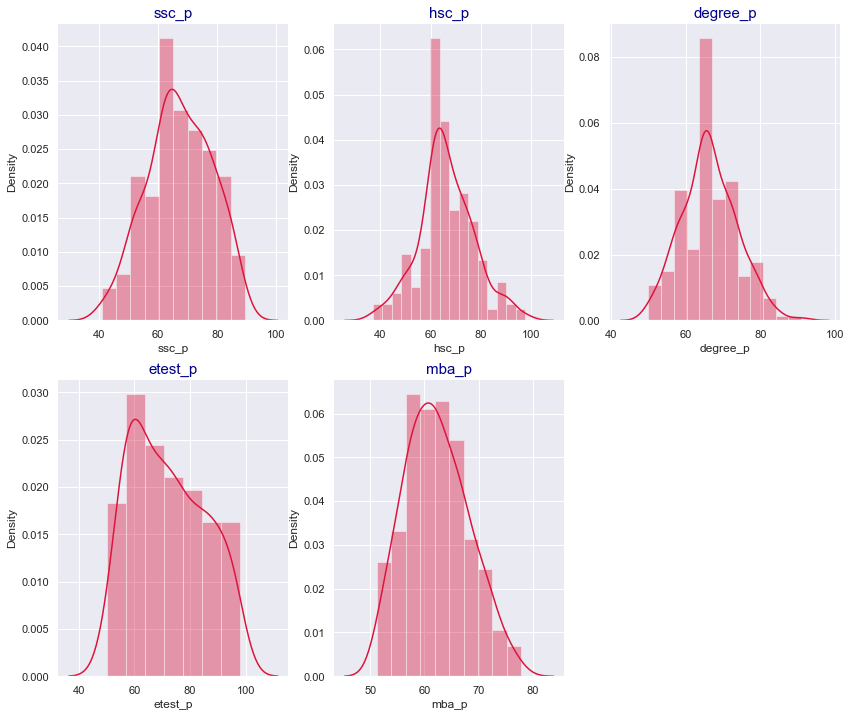

In [10]:
fig,ax = plt.subplots(2,3,figsize=(14,12))
for i in range(2):
    sns.distplot(df1_num.iloc[:,i+i+i], color='crimson', ax=ax[i][0])
    sns.distplot(df1_num.iloc[:,i+i+i+1], color='crimson',ax=ax[i][1])
    ax[i][0].set_title(df1_num.columns[i+i+i], color='darkblue', fontsize=15)
    ax[i][1].set_title(df1_num.columns[i+i+i+1], color='darkblue', fontsize=15)
    if i!=1:
        sns.distplot(df1_num.iloc[:,i+i+i+2], color='crimson', ax=ax[i][2])
        ax[i][2].set_title(df1_num.columns[i+i+i+2], color='darkblue', fontsize=15)
    sns.despine(left=True)    
fig.delaxes(ax[1][2])

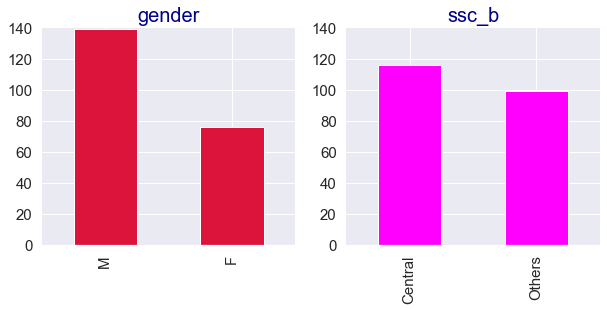

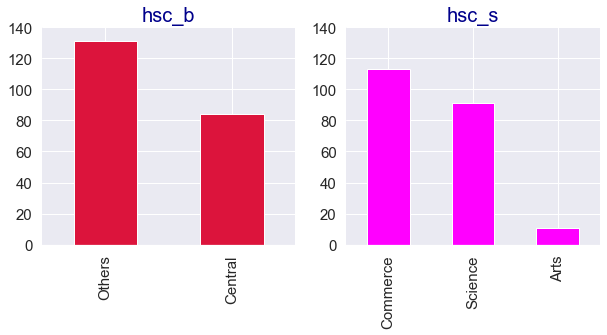

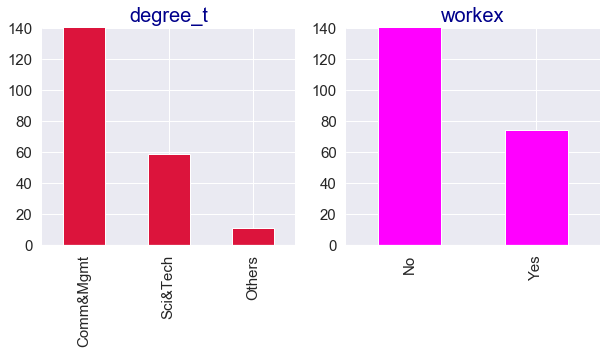

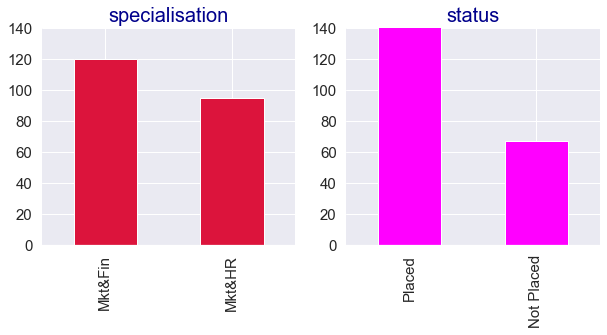

In [11]:
for i in range(4):
    fig,ax = plt.subplots(1,2,figsize=(10,4))
    df1_cat.iloc[:,i+i].value_counts().plot.bar(ax=ax[0],color='crimson',fontsize=15, ylim=(0,140))
    df1_cat.iloc[:,i+i+1].value_counts().plot.bar(ax=ax[1],color='magenta',fontsize=15, ylim=(0,140))
    ax[0].set_title(df1_cat.columns[i+i],fontsize=20,color='darkblue')
    ax[1].set_title(df1_cat.columns[i+i+1],fontsize=20,color='darkblue')
    sns.despine(left=True)

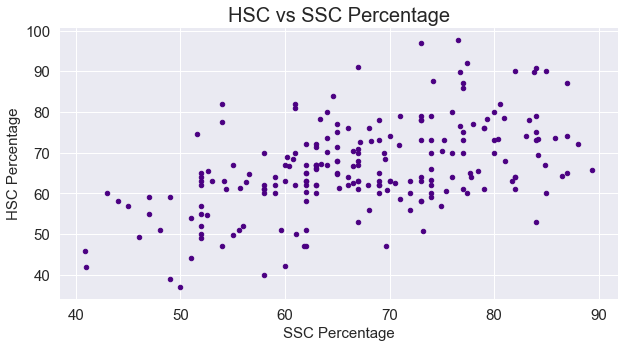

In [12]:
ax = df1_num.plot.scatter(x='ssc_p',y='hsc_p', fontsize=15, figsize=(10,5), color='indigo')
ax.set_xlabel('SSC Percentage', fontsize=15)
ax.set_ylabel('HSC Percentage', fontsize=15)
ax.set_title('HSC vs SSC Percentage', fontsize=20)
sns.despine(bottom=True, left=True)

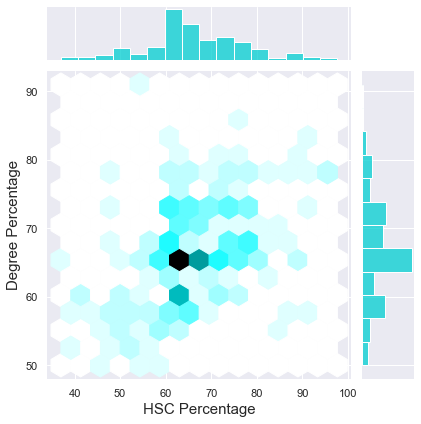

In [13]:
fig = sns.jointplot(data=df1_num, kind='hex',x='hsc_p',y='degree_p',color='darkturquoise')
plt.xlabel('HSC Percentage', fontsize=15)
plt.ylabel('Degree Percentage', fontsize=15)
sns.despine(bottom=True,left=True)
plt.show(fig)

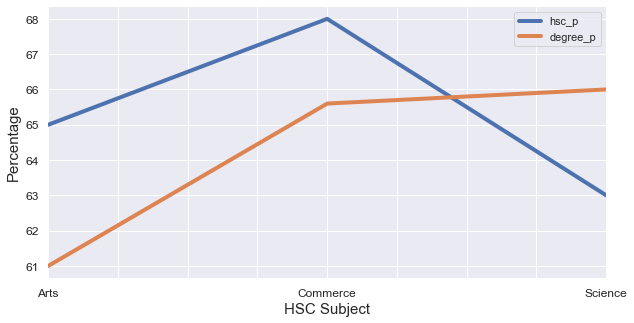

In [14]:
by_subject = df1.groupby('hsc_s')['hsc_p','degree_p'].median()
ax = by_subject.plot.line(figsize=(10,5), fontsize=12, linewidth=4)
ax.set_xlabel('HSC Subject',fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
sns.despine(bottom=True, left=True)

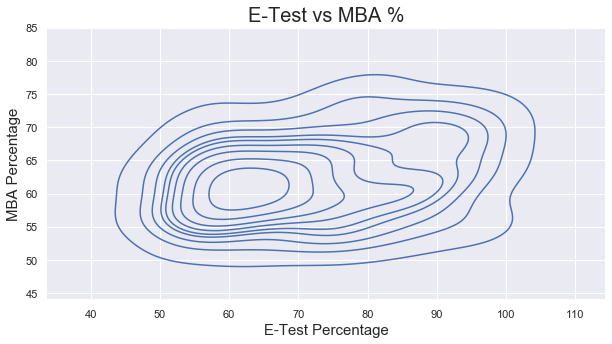

In [15]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax = sns.kdeplot(x=df1_num.etest_p,y=df1_num.mba_p)
ax.set_xlabel('E-Test Percentage', fontsize=15)
ax.set_ylabel('MBA Percentage', fontsize=15)
ax.set_title('E-Test vs MBA %', fontsize=20)
sns.despine(bottom=True,left=True)

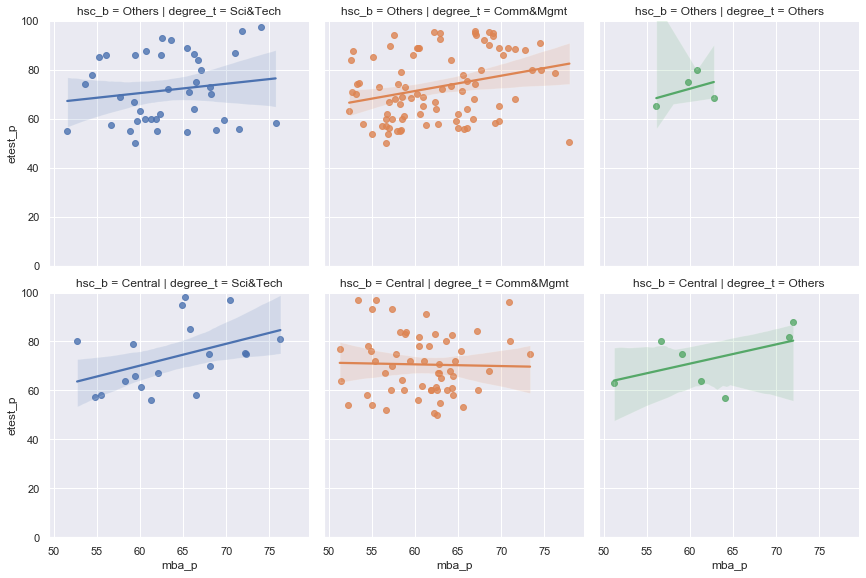

In [16]:
ax = sns.lmplot(x='mba_p',y='etest_p',col='degree_t',row='hsc_b',data=df1,hue='degree_t',height=4)
ax.set(ylim=(0,100))

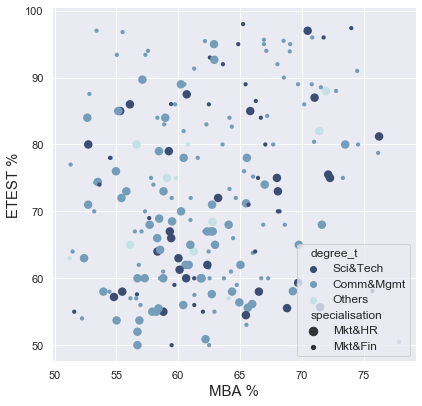

In [17]:
fig,ax = plt.subplots(figsize=(6.5,6.5))
ax = sns.scatterplot(x='mba_p',y='etest_p',hue='degree_t',size='specialisation',
               palette='ch:r=-.2,d=.3_r',data=df1, linewidth=0)
ax.set_xlabel('MBA %', fontsize=15)
ax.set_ylabel('ETEST %', fontsize=15)
sns.despine(bottom=True,left=True)

Text(0.5, 1.0, 'Not Placed')

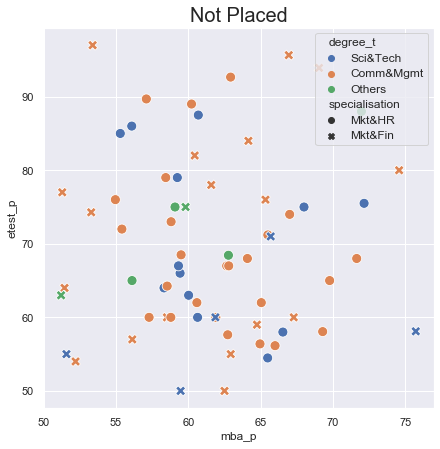

In [18]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.scatterplot(x='mba_p',y='etest_p', hue='degree_t', style='specialisation',data=df1[df1['status']=='Not Placed'], s=100)
ax.set_title('Not Placed', fontsize=20)

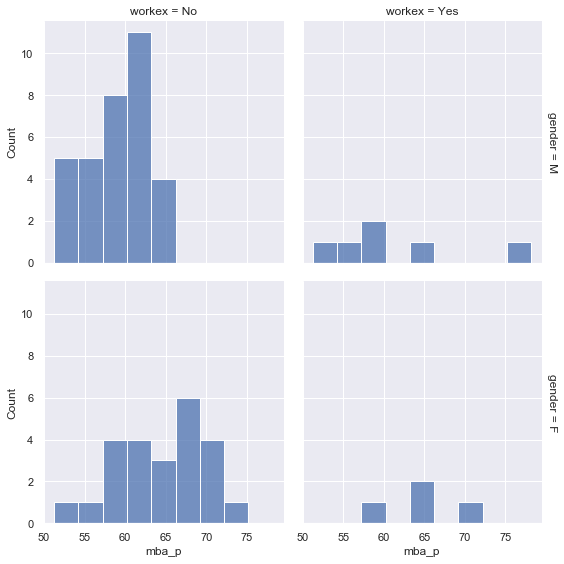

In [19]:
sns.displot(data=df1[df1['status']=='Not Placed'], x='mba_p', col='workex', row='gender', facet_kws={'margin_titles':True},
           binwidth=3, height=4)

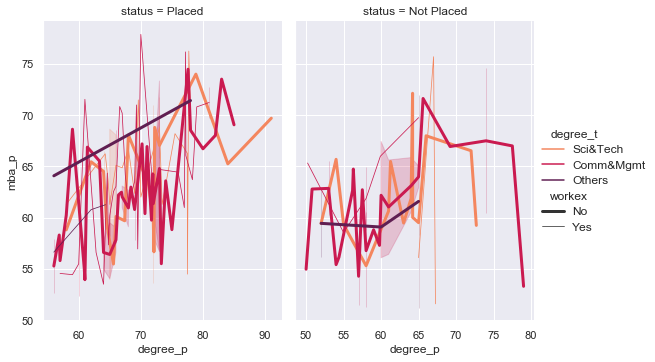

In [20]:
palette = sns.color_palette("rocket_r", n_colors=3)
sns.relplot(data=df1, x='degree_p', y='mba_p', hue='degree_t', size='workex', col='status', kind='line',
           palette=palette, height=5, aspect=0.75, facet_kws={'sharex':False})

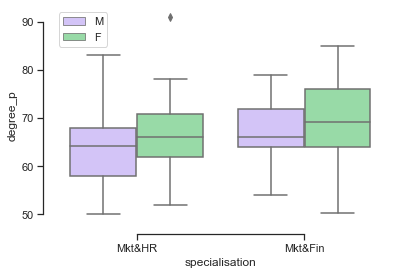

In [21]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x="specialisation", y="degree_p",
            hue="gender", palette=["m", "g"],
            data=df1)
ax.legend(loc='best')
sns.despine(offset=10, trim=True)

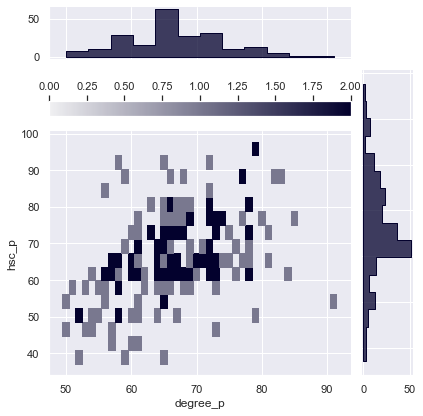

In [22]:
sns.set_theme(style='darkgrid')
g = sns.JointGrid(data=df1, x="degree_p", y="hsc_p", marginal_ticks=True)
g.plot_joint(sns.histplot, discrete=(True, False), cmap='light:#03012d', pmax=0.5, cbar=True,
            cbar_kws = dict(use_gridspec=False, location='top'))
g.plot_marginals(sns.histplot, element='step', color="#03012d")

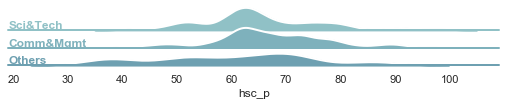

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df1, row="degree_t", hue="degree_t", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "hsc_p",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "hsc_p", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "hsc_p")
g.fig.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

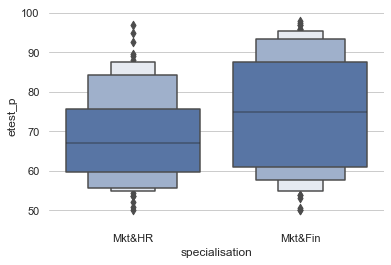

In [24]:
sns.set_theme(style="whitegrid")
sns.boxenplot(x="specialisation", y="etest_p",
              color="b",
              scale="linear", data=df1)
sns.despine(left=True, bottom=True)

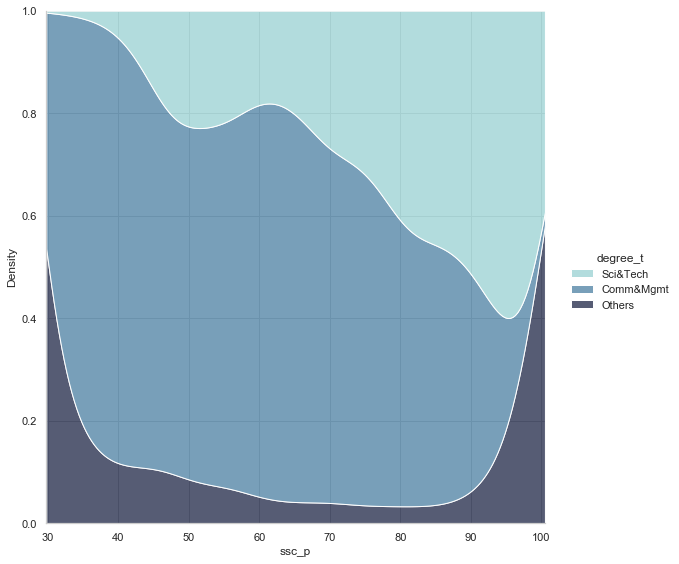

In [25]:
sns.displot(
    data=df1,
    x="ssc_p", hue="degree_t",
    kind="kde", height=8,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

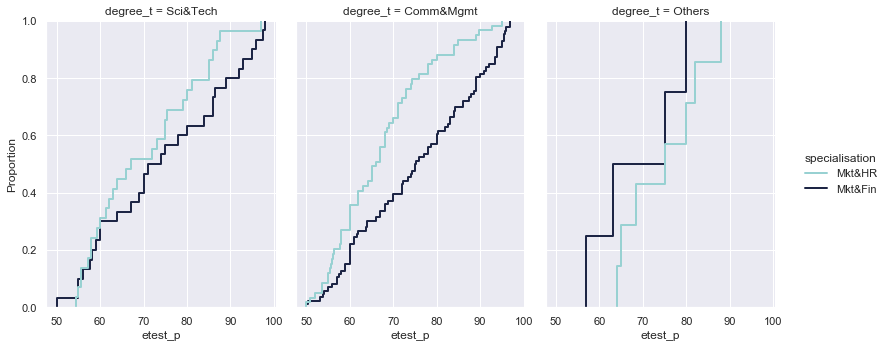

In [26]:
sns.set_theme(style='darkgrid')
sns.displot(
    df1,
    x="etest_p", col="degree_t", hue="specialisation",
    kind="ecdf", aspect=.75, linewidth=2, palette='ch:rot=-.25,hue=1,light=.75'
)

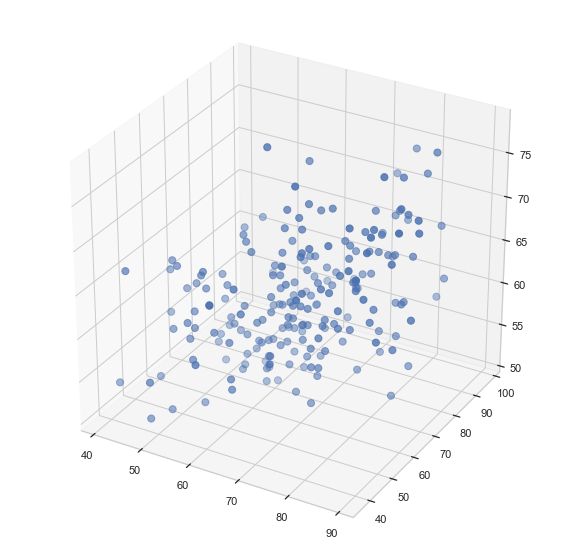

In [29]:
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xs=df1.ssc_p, ys=df1.hsc_p,zs=df1.mba_p,s=50)

[Text(0.5, 0, 'mba p '), Text(0.5, 0, 'hsc p'), Text(0.5, 0, 'ssc p')]

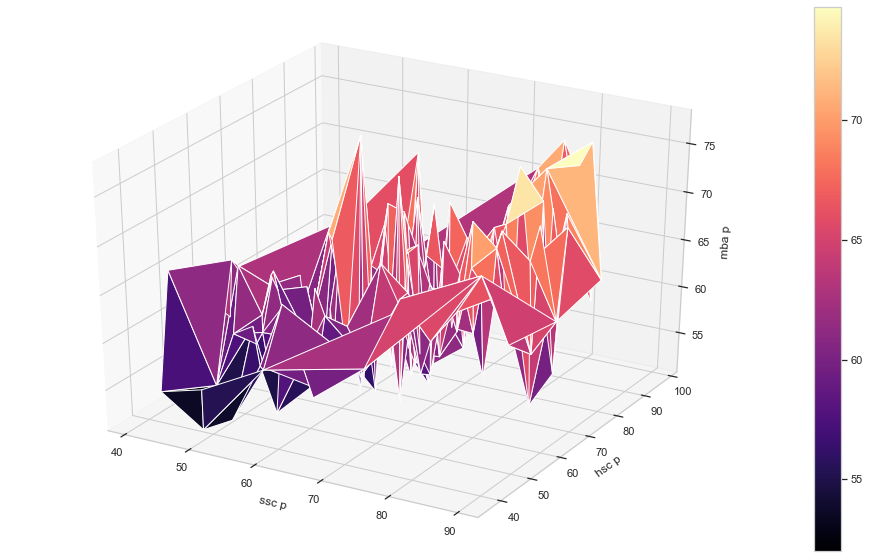

In [113]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
p = ax.plot_trisurf(df1.ssc_p, df1.hsc_p, df1.mba_p, cmap='magma', shade=True)
fig.colorbar(p, ax=ax)
ax.set(xlabel='ssc p', ylabel='hsc p', zlabel='mba p ')

## Feature Preprocessing

In [41]:
lb = LabelBinarizer()
for i in df1_cat.nunique()[df1_cat.nunique()==2].index:
    df1_cat[i] = lb.fit_transform(df1_cat[i])

In [43]:
df1_cat_1 = pd.get_dummies(df1_cat, drop_first=True)
df1_num_1 = MinMaxScaler().fit_transform(df1_num)
df1_num_1 = pd.DataFrame(df1_num_1, columns=df1_num.columns)
df2 = pd.concat([df1_num_1, df1_cat_1], axis='columns')

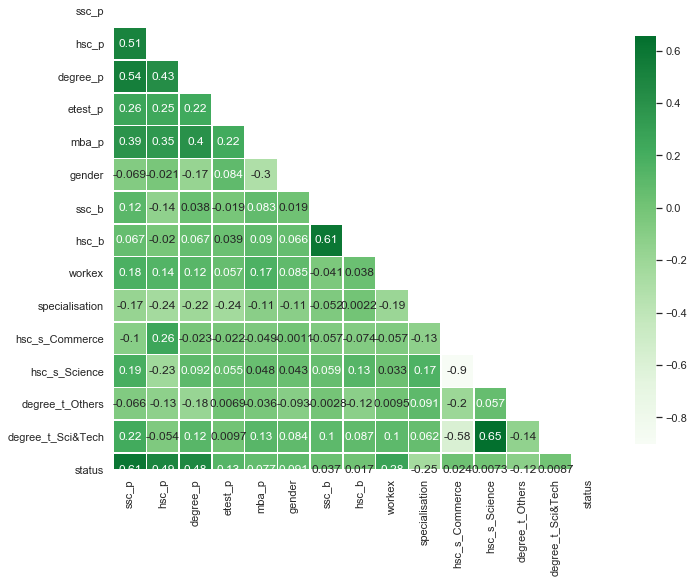

In [60]:
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 15))
sns.heatmap(corr, mask=mask, cmap='Greens', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [81]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
s = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
import lightgbm as lgb
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 100, class_weight = 'balanced')
for train_index, test_index in s.split(x, y):
    x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
model.fit(x_train,y_train, eval_set=[(x_test,y_test)], eval_metric='accuracy', verbose=200, early_stopping_rounds=1000)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[94]	valid_0's binary_logloss: 0.290207
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.90      1.00      0.95        37

    accuracy                           0.93        54
   macro avg       0.95      0.88      0.91        54
weighted avg       0.93      0.93      0.92        54



In [83]:
eli5.explain_weights(model)

Weight,Feature
0.4003,ssc_p
0.1500,degree_p
0.1174,hsc_p
0.0955,mba_p
0.0684,etest_p
0.0462,gender
0.0428,workex
0.0363,specialisation
0.0200,hsc_s_Commerce
0.0113,ssc_b


In [85]:
x = x.drop(['hsc_b','degree_t_Sci&Tech','degree_t_Others','hsc_s_Science'], axis='columns')

## Model building

#### Baseline Model

In [161]:
le = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
print('logistic',cross_val_score(le,x,y,cv=s))
print('rfc',cross_val_score(rfc,x,y,cv=s))
print('dt',cross_val_score(dt,x,y,cv=s))

logistic [0.77777778]
rfc [0.85185185]
dt [0.83333333]


#### Ensembles with tuning 

In [106]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',2,300)
    criterion = trial.suggest_categorical('criterion',['gini','entropy'])
    max_depth = trial.suggest_int('max_depth',2,32,log=True)
    min_samples_split = trial.suggest_int('min_samples_split',2,32)
    max_features = trial.suggest_int('max_features',1,10)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes',2,32)
    bootstrap = trial.suggest_categorical('bootstrap',[True,False])
    rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced',
                                n_estimators=n_estimators,
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                max_features=max_features,
                                max_leaf_nodes=max_leaf_nodes,
                                bootstrap=bootstrap)
    rfc.fit(x_train,y_train)
    y_pred = rfc.predict(x_test)
    score = f1_score(y_test,y_pred)
    return score

In [107]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=500)

[I 2021-07-28 22:10:02,752] A new study created in memory with name: no-name-efe37033-8f00-436c-8449-d376075f40d9
[I 2021-07-28 22:10:03,005] Trial 0 finished with value: 0.9135802469135803 and parameters: {'n_estimators': 53, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5, 'max_features': 3, 'max_leaf_nodes': 9, 'bootstrap': True}. Best is trial 0 with value: 0.9135802469135803.
[I 2021-07-28 22:10:03,321] Trial 1 finished with value: 0.9135802469135803 and parameters: {'n_estimators': 140, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 16, 'max_features': 6, 'max_leaf_nodes': 11, 'bootstrap': True}. Best is trial 0 with value: 0.9135802469135803.
[I 2021-07-28 22:10:03,771] Trial 2 finished with value: 0.9135802469135803 and parameters: {'n_estimators': 221, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 30, 'max_features': 10, 'max_leaf_nodes': 9, 'bootstrap': True}. Best is trial 0 with value: 0.9135802469135803.
[I 2021-07-28 22:10:04,053] Tr

[I 2021-07-28 22:10:13,169] Trial 27 finished with value: 0.9249999999999999 and parameters: {'n_estimators': 296, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 20, 'max_features': 6, 'max_leaf_nodes': 18, 'bootstrap': True}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:13,624] Trial 28 finished with value: 0.935064935064935 and parameters: {'n_estimators': 275, 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 25, 'max_features': 1, 'max_leaf_nodes': 14, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:13,978] Trial 29 finished with value: 0.9249999999999999 and parameters: {'n_estimators': 195, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 14, 'max_features': 3, 'max_leaf_nodes': 22, 'bootstrap': True}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:14,317] Trial 30 finished with value: 0.923076923076923 and parameters: {'n_estimators': 156, 'criterion': 'entrop

[I 2021-07-28 22:10:23,804] Trial 55 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 230, 'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 4, 'max_features': 4, 'max_leaf_nodes': 16, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:24,285] Trial 56 finished with value: 0.9024390243902439 and parameters: {'n_estimators': 271, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 24, 'max_features': 4, 'max_leaf_nodes': 17, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:24,647] Trial 57 finished with value: 0.923076923076923 and parameters: {'n_estimators': 229, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3, 'max_features': 3, 'max_leaf_nodes': 21, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:25,127] Trial 58 finished with value: 0.923076923076923 and parameters: {'n_estimators': 268, 'criterion': 'entr

[I 2021-07-28 22:10:35,177] Trial 83 finished with value: 0.923076923076923 and parameters: {'n_estimators': 292, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 20, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:35,520] Trial 84 finished with value: 0.923076923076923 and parameters: {'n_estimators': 206, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 22, 'max_features': 8, 'max_leaf_nodes': 15, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:35,900] Trial 85 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 248, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 22, 'max_features': 9, 'max_leaf_nodes': 14, 'bootstrap': False}. Best is trial 5 with value: 0.9367088607594937.
[I 2021-07-28 22:10:36,247] Trial 86 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 222, 'criterion': '

[I 2021-07-28 22:10:45,011] Trial 111 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 80, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 6, 'max_features': 6, 'max_leaf_nodes': 32, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:10:45,343] Trial 112 finished with value: 0.9249999999999999 and parameters: {'n_estimators': 151, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'max_features': 6, 'max_leaf_nodes': 30, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:10:45,666] Trial 113 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 143, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 3, 'max_features': 7, 'max_leaf_nodes': 29, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:10:45,989] Trial 114 finished with value: 0.9249999999999999 and parameters: {'n_estimators': 135, 'crite

[I 2021-07-28 22:10:54,690] Trial 138 finished with value: 0.923076923076923 and parameters: {'n_estimators': 259, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 5, 'max_features': 6, 'max_leaf_nodes': 11, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:10:55,052] Trial 139 finished with value: 0.923076923076923 and parameters: {'n_estimators': 218, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 7, 'max_features': 7, 'max_leaf_nodes': 31, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:10:55,655] Trial 140 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 265, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 9, 'max_features': 7, 'max_leaf_nodes': 30, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:10:55,962] Trial 141 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 84, 'criteri

[I 2021-07-28 22:11:03,519] Trial 165 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:03,829] Trial 166 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:04,139] Trial 167 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 89, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:04,455] Trial 168 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 87, 'criterio

[I 2021-07-28 22:11:11,684] Trial 192 finished with value: 0.923076923076923 and parameters: {'n_estimators': 76, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 8, 'max_features': 8, 'max_leaf_nodes': 26, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:11,994] Trial 193 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 114, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 24, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:12,316] Trial 194 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 105, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 4, 'max_features': 8, 'max_leaf_nodes': 26, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:12,609] Trial 195 finished with value: 0.935064935064935 and parameters: {'n_estimators': 60, 'criterion'

[I 2021-07-28 22:11:20,079] Trial 219 finished with value: 0.935064935064935 and parameters: {'n_estimators': 58, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4, 'max_features': 8, 'max_leaf_nodes': 26, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:20,367] Trial 220 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 34, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'max_features': 9, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:20,624] Trial 221 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 6, 'max_features': 9, 'max_leaf_nodes': 27, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:20,890] Trial 222 finished with value: 0.935064935064935 and parameters: {'n_estimators': 30, 'criterion': 

[I 2021-07-28 22:11:28,291] Trial 246 finished with value: 0.935064935064935 and parameters: {'n_estimators': 175, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 8, 'max_features': 9, 'max_leaf_nodes': 27, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:28,601] Trial 247 finished with value: 0.935064935064935 and parameters: {'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:28,895] Trial 248 finished with value: 0.935064935064935 and parameters: {'n_estimators': 37, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 28, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:29,251] Trial 249 finished with value: 0.935064935064935 and parameters: {'n_estimators': 186, 'criterion':

[I 2021-07-28 22:11:36,700] Trial 273 finished with value: 0.935064935064935 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:37,047] Trial 274 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 159, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 27, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:37,370] Trial 275 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 27, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:37,707] Trial 276 finished with value: 0.935064935064935 and parameters: {'n_estimators': 160, 'criterio

[I 2021-07-28 22:11:45,427] Trial 300 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 94, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 22, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:45,784] Trial 301 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 195, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:46,093] Trial 302 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 90, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 28, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:46,453] Trial 303 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 196, 'criteri

[I 2021-07-28 22:11:54,067] Trial 327 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 195, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:54,380] Trial 328 finished with value: 0.9024390243902439 and parameters: {'n_estimators': 124, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2, 'max_features': 7, 'max_leaf_nodes': 30, 'bootstrap': True}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:54,685] Trial 329 finished with value: 0.935064935064935 and parameters: {'n_estimators': 102, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 30, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:11:55,016] Trial 330 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 197, 'criter

[I 2021-07-28 22:12:02,990] Trial 354 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 4, 'max_features': 8, 'max_leaf_nodes': 26, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:03,328] Trial 355 finished with value: 0.923076923076923 and parameters: {'n_estimators': 162, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2, 'max_features': 10, 'max_leaf_nodes': 31, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:03,673] Trial 356 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 193, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:03,993] Trial 357 finished with value: 0.9249999999999999 and parameters: {'n_estimators': 135, 'criteri

[I 2021-07-28 22:12:12,005] Trial 381 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 199, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:12,328] Trial 382 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 6, 'max_features': 8, 'max_leaf_nodes': 22, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:12,695] Trial 383 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 188, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8, 'max_features': 8, 'max_leaf_nodes': 22, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:13,059] Trial 384 finished with value: 0.935064935064935 and parameters: {'n_estimators': 186, 'criter

[I 2021-07-28 22:12:20,708] Trial 408 finished with value: 0.935064935064935 and parameters: {'n_estimators': 108, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'max_features': 7, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:21,025] Trial 409 finished with value: 0.935064935064935 and parameters: {'n_estimators': 69, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6, 'max_features': 9, 'max_leaf_nodes': 23, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:21,335] Trial 410 finished with value: 0.923076923076923 and parameters: {'n_estimators': 77, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 6, 'max_features': 9, 'max_leaf_nodes': 27, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:21,661] Trial 411 finished with value: 0.935064935064935 and parameters: {'n_estimators': 99, 'criterion': 

[I 2021-07-28 22:12:29,390] Trial 435 finished with value: 0.935064935064935 and parameters: {'n_estimators': 181, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:29,720] Trial 436 finished with value: 0.935064935064935 and parameters: {'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 24, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:30,051] Trial 437 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 89, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'max_features': 8, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:30,344] Trial 438 finished with value: 0.923076923076923 and parameters: {'n_estimators': 49, 'criterion': 

[I 2021-07-28 22:12:38,232] Trial 462 finished with value: 0.935064935064935 and parameters: {'n_estimators': 28, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 4, 'max_features': 8, 'max_leaf_nodes': 25, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:38,687] Trial 463 finished with value: 0.9487179487179488 and parameters: {'n_estimators': 197, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 7, 'max_features': 8, 'max_leaf_nodes': 22, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:39,004] Trial 464 finished with value: 0.935064935064935 and parameters: {'n_estimators': 73, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8, 'max_features': 8, 'max_leaf_nodes': 21, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:39,319] Trial 465 finished with value: 0.9367088607594937 and parameters: {'n_estimators': 72, 'criterion'

[I 2021-07-28 22:12:47,176] Trial 489 finished with value: 0.923076923076923 and parameters: {'n_estimators': 37, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5, 'max_features': 9, 'max_leaf_nodes': 26, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:47,464] Trial 490 finished with value: 0.935064935064935 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 6, 'max_features': 9, 'max_leaf_nodes': 26, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:47,754] Trial 491 finished with value: 0.9249999999999999 and parameters: {'n_estimators': 32, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 7, 'max_features': 1, 'max_leaf_nodes': 29, 'bootstrap': False}. Best is trial 101 with value: 0.9487179487179488.
[I 2021-07-28 22:12:48,213] Trial 492 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 194, 'criterion':

In [108]:
study.best_params

{'n_estimators': 147,
 'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_split': 5,
 'max_features': 7,
 'max_leaf_nodes': 30,
 'bootstrap': False}

In [109]:
rfc = RandomForestClassifier(n_estimators=147,criterion='entropy',max_depth=13,
                            min_samples_split=5,
                            max_features=7,
                            max_leaf_nodes=30,
                            bootstrap=False)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.88      1.00      0.94        37

    accuracy                           0.91        54
   macro avg       0.94      0.85      0.88        54
weighted avg       0.92      0.91      0.90        54



## Key Findings And Conclusion

As the classes were a little unbalanced (around 70/30), we focussed more on a better f1 score. We saw random forest performed better than logistic regression. The key findings were that the scores of earlier academics played a major contribution in the student getting placed. The features which did not contribute were removed. 
As we saw, lightGBM performed best when used vanilla without tuning and gave an accuracy of 93% with an f1 score of 95%, it can be looked further into to improve the performance, catboost and xgboost might also be tried. Stacking can improve performance too.
Here we have just tuned the baseline model to achieve it's optimum performance. It shows tree based models perform the best on the dataset.

In [ ]:
!pip install -U notebook-as-pdf
!pyppeteer-install

Requirement already up-to-date: notebook-as-pdf in c:\users\kaustubh\anaconda3\lib\site-packages (0.5.0)
